In [47]:
import string

In [48]:
from scipy import stats

In [49]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt

In [51]:
import re

In [52]:
def find_strength(string):
    value = string.find('/6')
    if string[value-1] is '(':
        return (None)
    else:
        return string[value-1]

<>:3: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/var/folders/fs/pnl72jg96ydgx961mfft__pc0000gn/T/ipykernel_6129/584768121.py:3: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if string[value-1] is '(':


In [53]:
def cigar_details(string):
    size = string.split('\n')
    return size[2].strip()

In [54]:
#consider striping '-' before date and turing string into date-time object
def cigar_og_issue_date(string):
    size = string.split('\n')
    return size[3].strip()

In [55]:
#built for df.gauge
def make_int(string):
    try:
        string = int(string)
        return string
    except:
        pass

In [56]:
from fractions import Fraction
#convert some string into floats (inch)
def convert_length_2_float(string):
    try:
        string = string.strip('"')
        string = string.split(' ')
        inch = int(string[0])
        if string[1]:
            fraction = string[1]
        return (inch + float(Fraction(fraction)))
    except:
        string = string.strip('"')
        string = string.split(' ')
        inch = int(string[0])
        return inch

In [83]:
def standardize_size(size):
    """
    Standardizes cigar size strings by correcting common misspellings and variations.

    Parameters:
        size (str): The size string to standardize.

    Returns:
        str: The corrected size string.
    """
    corrections = {
        'robusto': 'Robusto',
        'FIgurado': 'Figurado',
        'Figruado': 'Figurado',
        'Panetlea': 'Panetela',
        'Churcill': 'Churchill',
        'Patit Corona': 'Petite Corona',
        'Petite Corona': 'Petite Corona',
        'Misc.': 'Miscellaneous'
    }
    
    # Return the corrected value if it exists in corrections, otherwise return the original
    return corrections.get(size, size)


In [86]:
# Apply the function to the 'size' column
df['size'] = df['size'].apply(standardize_size)

# Check unique values to verify corrections
print(df['size'].unique())

['Robusto' 'Corona' 'Double Corona' 'Lonsdale' '"A"' 'Churchill' 'Toro'
 'Figurado' 'Panetela' 'Petit Corona' 'Maduro' 'Corona Gorda' 'Odd'
 'Vintage' nan 'Petite Corona' 'Grande' 'Torpedo' 'Miscellaneous']


In [87]:
df['size'].value_counts()

size
Toro             3848
Figurado         3659
Robusto          3477
Churchill        2791
Corona           1701
Lonsdale         1348
Double Corona     949
Petit Corona      935
Panetela          685
Odd               575
Grande            375
Maduro            196
"A"               189
Vintage            14
Corona Gorda        4
Petite Corona       3
Miscellaneous       3
Torpedo             1
Name: count, dtype: int64

In [58]:
#not a good way to do it.

#or maybe filtering via dictionary is a good idea. either way, keep an original csv!!!!

#replacement dictionary for the factory country column
country_replacement_dict = {'Cuba':'cub', 'Dominican Republic':'dr', 'Nicaragua':'nic', 'Honduras':'hon', 'Jamaica':'jam',
       'Mexico':'mex', 'U.S.A.':'usa', 'Philippines':'phl', 'Canary Islands':'can', 'Brazil':'brz',
       'Nicaragua, Honduras':'nic', 'Costa Rica':'cst', 'Indonesia':'ind', 'Bahamas':'bah',
       'Panama':'pan', 'nan':None, 'USA':'usa', 'NIcaragua':'nic', 'El Salvador':'sal', 'Colombia':'col',
       'Dominican  Republic':'dr', 'Dominican Repubcic':'dr', 'Dominican Repubilc':'dr',
       'Dom. Rep.':'dr', 'Nicaraqua':'nic', 'U.S.A':'usa', 'Domincan Republic':'dr',
       'Nicarag’ua':'nic', 'Dominican Rep"ublic':'dr'}
#df.country.replace(replacement_dict, inplace=True)

#will change the mispelling to the last mispelling so i only have one mispelled country instead of multiples
replacement_dict = {value : key for (key, value) in country_replacement_dict.items()}

#example
replacement_dict['nic'] = 'Nicaragua'

#return back to OG label w/ caps
#df.country.replace(replacement_dict, inplace=True)


In [59]:
#split binder, but it's terrible. went from 86 to 66 features
def filler_binder_wrapper_reduce(string):
    vowels = ['a','e','i','o','u']
    try:
        string = string.lower()
        string = string.replace('.','')
        string = string.replace(' ', '')
        string = "".join([x for x in string if x not in vowels])
        return (string)#[:10])
    except AttributeError:
        return None

In [60]:
df = pd.read_csv('data/cigar_aficionado.csv', index_col='Unnamed: 0')

In [15]:
df

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,https://img.mshanken.com/d/cao/ratings_extras/...,E.P. Carrillo Encore TAA 656,89,"5""",56.0,background:url('https://img.mshanken.com/d/cao...,"Chocolate-brown with a multi-seamed cap, this ...",Toro,Nicaragua,Nicaragua,Nicaragua,Dominican Republic,$13.25,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22539,5.0,Cigar Insider,"– Dec 08, 2020"
20770,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Short Churchill (Tubo),92,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,The smoke from this oily robusto imparts a bol...,Robusto,Cuba,Cuba,Cuba,Cuba,£24.50,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22540,5.0,Cigar Insider,"– Dec 08, 2020"
20771,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Wide Churchill (Tubo),89,"5 1/8""",55.0,background:url('https://img.mshanken.com/d/cao...,Dark and well-made with a multi-seamed cap and...,Robusto,Cuba,Cuba,Cuba,Cuba,£31.70,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22541,5.0,Cigar Insider,"– Dec 08, 2020"
20772,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Petit Churchill (Tubo),86,"4""",50.0,background:url('https://img.mshanken.com/d/cao...,"The smoke of this dark, oily cigar is somewhat...",Odd,Cuba,Cuba,Cuba,Cuba,£22.10,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22542,5.0,Cigar Insider,"– Dec 08, 2020"


<Axes: >

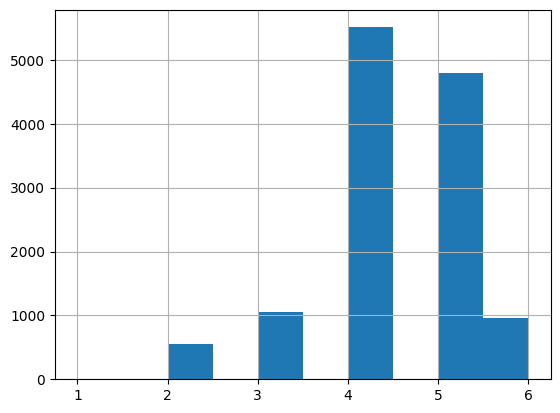

In [16]:
df['strength'].hist()

# ttests of score by country 

In [17]:
scores_df = df.groupby("country").filter(lambda x: len(x) > 10)

In [18]:
scores_df.country.value_counts()

country
Dominican Republic    8402
Nicaragua             4941
Honduras              3469
Cuba                  2763
U.S.A                  371
Mexico                 201
Jamaica                175
Costa Rica             117
Bahamas                111
Canary Islands          88
Brazil                  42
Philippines             41
Indonesia               19
Name: count, dtype: int64

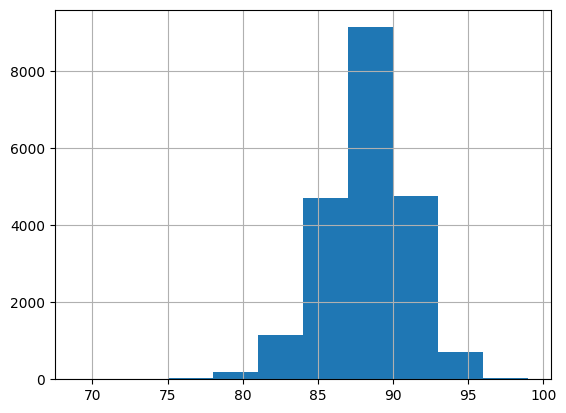

In [19]:
scores_df.score.hist();

count    8402.000000
mean       87.084385
std         2.656531
min        75.000000
25%        85.000000
50%        87.000000
75%        89.000000
max        97.000000
Name: score, dtype: float64


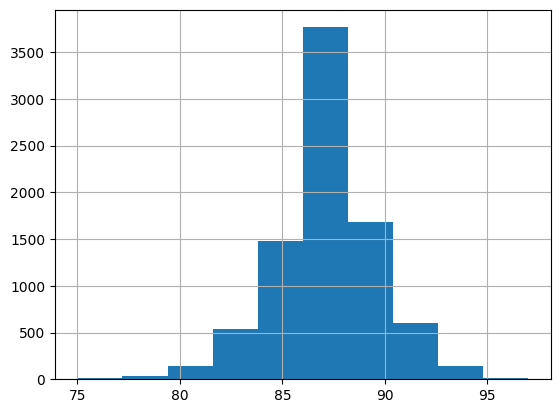

In [20]:
dr_score = scores_df[scores_df.country == 'Dominican Republic'].score
print(dr_score.describe())
dr_score.hist();

count    2763.000000
mean       89.540355
std         2.364676
min        80.000000
25%        88.000000
50%        90.000000
75%        91.000000
max        99.000000
Name: score, dtype: float64


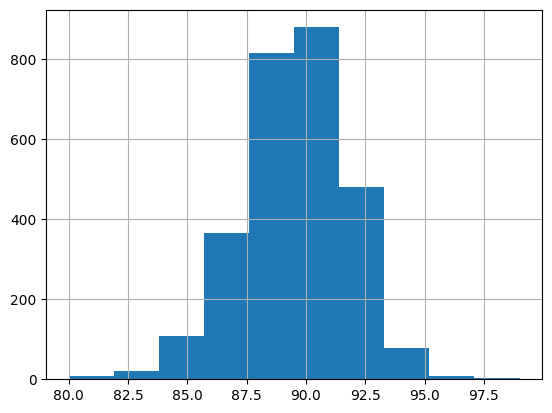

In [21]:
cuba_score = scores_df[scores_df.country == 'Cuba'].score
print(cuba_score.describe())
cuba_score.hist();

count    4941.000000
mean       88.638939
std         2.487128
min        76.000000
25%        87.000000
50%        89.000000
75%        90.000000
max        97.000000
Name: score, dtype: float64


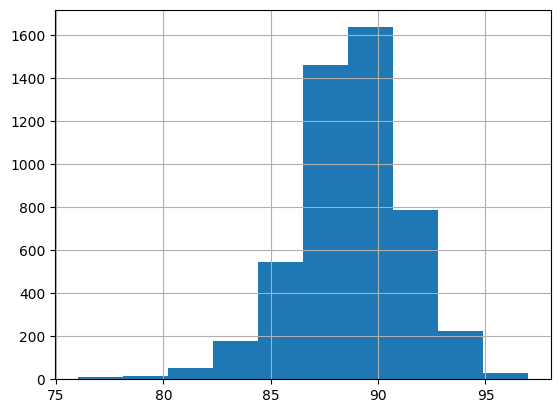

In [22]:
nic_score = scores_df[scores_df.country == 'Nicaragua'].score
print(nic_score.describe())
nic_score.hist();

count    3469.000000
mean       87.237532
std         2.756678
min        70.000000
25%        86.000000
50%        87.000000
75%        89.000000
max        96.000000
Name: score, dtype: float64


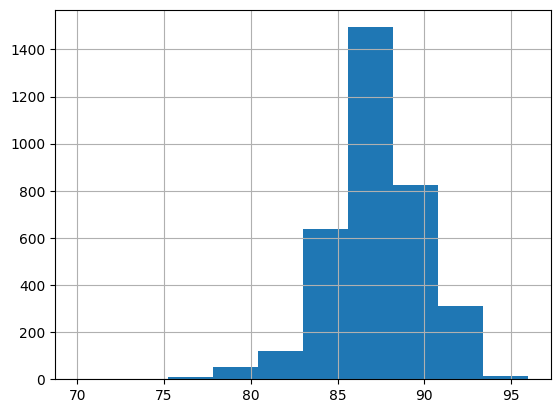

In [23]:
hon_score = scores_df[scores_df.country == 'Honduras'].score
print(hon_score.describe())
hon_score.hist();

count    371.000000
mean      88.169811
std        2.531051
min       80.000000
25%       87.000000
50%       88.000000
75%       90.000000
max       93.000000
Name: score, dtype: float64


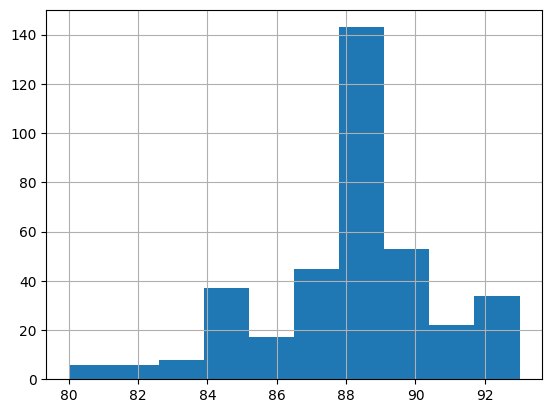

In [24]:
usa_score = scores_df[scores_df.country == 'U.S.A'].score
print(usa_score.describe())
usa_score.hist();

count    175.000000
mean      85.668571
std        2.043742
min       80.000000
25%       84.000000
50%       86.000000
75%       87.000000
max       91.000000
Name: score, dtype: float64


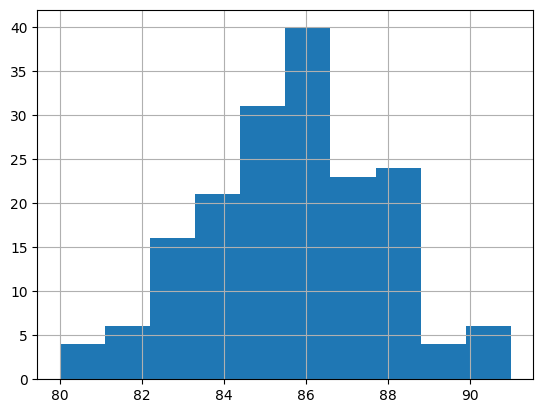

In [25]:
jam_score = scores_df[scores_df.country == 'Jamaica'].score
print(jam_score.describe())
jam_score.hist();

count    201.000000
mean      84.666667
std        4.154917
min       69.000000
25%       82.000000
50%       85.000000
75%       87.000000
max       94.000000
Name: score, dtype: float64


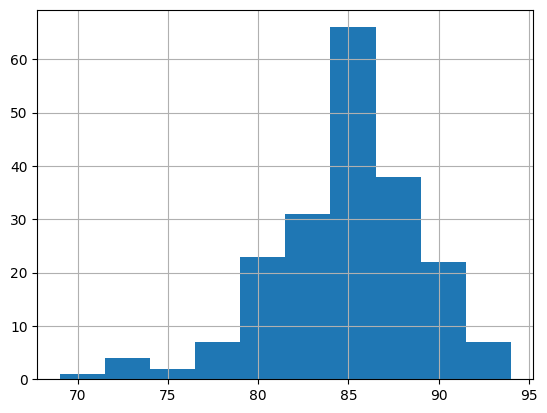

In [26]:
mex_score = scores_df[scores_df.country == 'Mexico'].score
print(mex_score.describe())
mex_score.hist();

In [27]:
scores_df.score.describe()

count    20740.000000
mean        87.766538
std          2.812987
min         69.000000
25%         86.000000
50%         88.000000
75%         90.000000
max         99.000000
Name: score, dtype: float64

# fixing the features

In [37]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [38]:
df.country.unique()

array(['Cuba', 'Dominican Republic', 'Nicaragua', 'Honduras', 'Jamaica',
       'Mexico', 'U.S.A', 'Philippines', 'Canary Islands', 'Brazil',
       'Costa Rica', 'Indonesia', 'Bahamas', 'Panama', nan, 'El Salvador',
       'Colombia'], dtype=object)

In [39]:
df.gauge.unique()

array([50., 43., 44., 52., 49., 42., 48., 47., 41., 56., 45., 46., 54.,
       38., 36., 51., 34., 35., 30., 40., 55., 60., 58., 64., 33., 32.,
       31., 66., 37., 28., 39., 53., nan, 62., 61., 29., 26., 57.,  5.,
       67., 59.,  6., 65., 70., 24., 63., 80.])

In [40]:
len(df.binder.unique())

86

In [41]:
df.binder.describe()

count         20739
unique           85
top       Dom. Rep.
freq           6006
Name: binder, dtype: object

In [42]:
df.binder.value_counts()

binder
Dom. Rep.                 6006
Nicaragua                 5899
Cuba                      2760
Honduras                  1573
Mexico                    1309
                          ... 
Philipines                   1
U.S.A./Conn. Braodleaf       1
Nicaraua                     1
tk                           1
U.S.A./Penn. Broadleaf       1
Name: count, Length: 85, dtype: int64

# filler -start at 387 to 334

In [43]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"


# length

In [44]:
def clean_inches(values):
    cleaned_values = []
    for value in values:
        if type(value) != str:  # skip any non-string values
            continue
        value = value.strip()  # remove any leading/trailing spaces
        if '"' not in value:  # skip any values that don't contain "
            continue
        parts = value.split('"')[0].split()  # extract the whole number and fraction parts
        if len(parts) == 1:  # if there's only one part, assume it's a whole number of inches
            inches = float(parts[0])
        else:
            whole_inches = int(parts[0])
            fraction_parts = parts[1].split('/')
            numerator = int(fraction_parts[0])
            denominator = int(fraction_parts[1])
            inches = whole_inches + (numerator / denominator)
        cleaned_values.append(inches)
    return cleaned_values


In [45]:
# import re

# def clean_inches(measurement):
#     measurement = str(measurement).strip()
#     print(measurement)
#     if measurement == '' or measurement == 'nan':
#         return None
#     elif '"' in measurement:
#         return float(measurement[:-1])
#     elif ' ' in measurement:
#         whole, fraction = measurement.split()
#         whole = float(whole)
#         num, denom = fraction.split('/')
#         fraction = float(num) / float(denom)
#         return whole + fraction
#     else:
#         return float(measurement)


In [61]:
# df['length'] = df['length'].apply(lambda x: clean_inches(x))

In [62]:
df['length'].value_counts()

length
6"        3258
5"        2591
7"        2535
5 1/2"    2074
6 1/2"    1559
          ... 
6 9/6"       1
tk"          1
TK           1
5'           1
4 1/4        1
Name: count, Length: 126, dtype: int64

In [63]:
dirty_list = ['4 7/8"', '5 5/8"', '5 1/2"', '5"', '4 1/2"', '7 5/8"', '7 1/2"',
       '6"', '5 9/16"', '5 1/4"', '5 7/8"', '5 3/4"', '6 1/2"', '6 5/8"',
       '6 3/4"', '7"', '6 1/4"', '6 7/8"', '6 9/16"', '4 3/4"', '5 1/8"',
       '8 1/2"', '8"', '7 1/4"', '6 3/8"', '6 1/8"', '6 5/16"', '4 5/8"',
       '7 3/4"', '6 1/2', '4 1/4"', '9"', '6 15/16', '8 1/4"', '8 2/3"',
       '5 1/16"', '6 7/4"', '4"', '5 3/5"', '8 1/2', '7 1/2', '7 5/8',
       '7 3/4', '9 1/4"', '5 3/8"', '8 7/8"', '7 1/8"', '5 1/5"',
       '5 3/16"', '8 1/4', '10"', '4 1/5"', '4 1/4 "', '5 1/3"',
       '4 1/2 "', '6 1/3"', '6 1/5"', '8', None, '9 1/2"', '3 1/2"',
       '4 3/8"', '7 7/8"', '7 3/8"', '4', '6 1/2 "', "7 1/4'", '7 2/4"',
       '6 3/32"', '8 5/8"', '3 5/8"', '8 3/4"', '4 1/3"', '5 5/8""',
       '5"\x0b', '3 15/16"', '6 11/16"', '5 11/16"', '4 5/16"', '4 1/8"',
       '4 15/16"', '4 3/16"', '"', '6 1/8', '9 1/8', '7 1/4', '4 4/5"',
       '6 9/6"', 'tk"', '12"', '50', '52', 'TK', '6 1/4', '3 3/4"',
       '5 3/4', "5'", "6'", "6 1/2'", '3 7/8"', '50"', '6 3/16"', '5 3/8',
       '5 7/8', '4 3/8', '4 7/8', '7 1/8', '5 3/4 inch', '6 1/4 inch',
       '4 1/ 2 inc', '5 1/4', '5 5/16"', '4" 1/4', '4 3/4', '52"',
       '5 5/8', '3 1/4"', '60', '3 5/8""', '2"', '4 1/2', '3"', '6 1/10"',
       '5 15/16"', '4 3/5"', '4 5/7"', '4 1/4']

In [64]:
cleaned_list = [s.replace('"', '').replace("'", '') for s in dirty_list]


AttributeError: 'NoneType' object has no attribute 'replace'

In [65]:
cleaned_list = []
for s in dirty_list:
    try:
        s = s.replace('"', '').replace("'", '')
        cleaned_list.append(float(s.split()[0]) + float(s.split()[1].split('/')[0])/float(s.split()[1].split('/')[1]))
    except:
        pass

print(cleaned_list)

[4.875, 5.625, 5.5, 4.5, 7.625, 7.5, 5.5625, 5.25, 5.875, 5.75, 6.5, 6.625, 6.75, 6.25, 6.875, 6.5625, 4.75, 5.125, 8.5, 7.25, 6.375, 6.125, 6.3125, 4.625, 7.75, 6.5, 4.25, 6.9375, 8.25, 8.666666666666666, 5.0625, 7.75, 5.6, 8.5, 7.5, 7.625, 7.75, 9.25, 5.375, 8.875, 7.125, 5.2, 5.1875, 8.25, 4.2, 4.25, 5.333333333333333, 4.5, 6.333333333333333, 6.2, 9.5, 3.5, 4.375, 7.875, 7.375, 6.5, 7.25, 7.5, 6.09375, 8.625, 3.625, 8.75, 4.333333333333333, 5.625, 3.9375, 6.6875, 5.6875, 4.3125, 4.125, 4.9375, 4.1875, 6.125, 9.125, 7.25, 4.8, 7.5, 6.25, 3.75, 5.75, 6.5, 3.875, 6.1875, 5.375, 5.875, 4.375, 4.875, 7.125, 5.75, 6.25, 5.25, 5.3125, 4.25, 4.75, 5.625, 3.25, 3.625, 4.5, 6.1, 5.9375, 4.6, 4.714285714285714, 4.25]


In [66]:
df

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,https://img.mshanken.com/d/cao/ratings_extras/...,E.P. Carrillo Encore TAA 656,89,"5""",56.0,background:url('https://img.mshanken.com/d/cao...,"Chocolate-brown with a multi-seamed cap, this ...",Toro,Nicaragua,Nicaragua,Nicaragua,Dominican Republic,$13.25,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22539,5.0,Cigar Insider,"– Dec 08, 2020"
20770,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Short Churchill (Tubo),92,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,The smoke from this oily robusto imparts a bol...,Robusto,Cuba,Cuba,Cuba,Cuba,£24.50,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22540,5.0,Cigar Insider,"– Dec 08, 2020"
20771,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Wide Churchill (Tubo),89,"5 1/8""",55.0,background:url('https://img.mshanken.com/d/cao...,Dark and well-made with a multi-seamed cap and...,Robusto,Cuba,Cuba,Cuba,Cuba,£31.70,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22541,5.0,Cigar Insider,"– Dec 08, 2020"
20772,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Petit Churchill (Tubo),86,"4""",50.0,background:url('https://img.mshanken.com/d/cao...,"The smoke of this dark, oily cigar is somewhat...",Odd,Cuba,Cuba,Cuba,Cuba,£22.10,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22542,5.0,Cigar Insider,"– Dec 08, 2020"


# EDA redux

In [68]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [70]:
df['country'].unique()

array(['Cuba', 'Dominican Republic', 'Nicaragua', 'Honduras', 'Jamaica',
       'Mexico', 'U.S.A', 'Philippines', 'Canary Islands', 'Brazil',
       'Costa Rica', 'Indonesia', 'Bahamas', 'Panama', nan, 'El Salvador',
       'Colombia'], dtype=object)

<Axes: xlabel='country'>

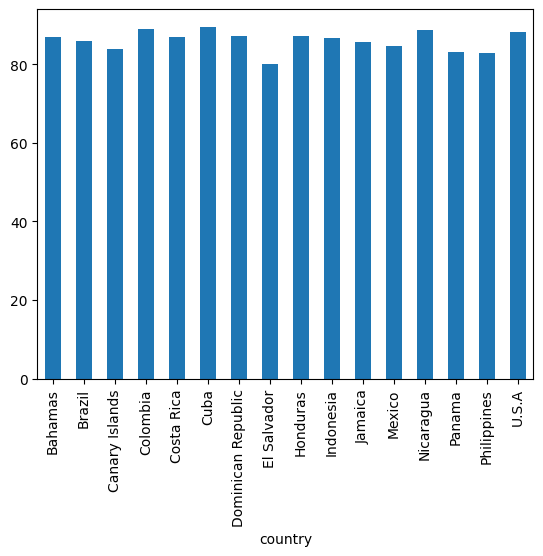

In [73]:
df.groupby('country')['score'].mean().plot(kind='bar')

In [81]:
df['size'].unique()

array(['Robusto', 'Corona', 'Double Corona', 'Lonsdale', '"A"',
       'Churchill', 'Toro', 'Figurado', 'Panetela', 'Petit Corona',
       'Maduro', 'Corona Gorda', 'Odd', 'Vintage', nan, 'Patit Corona',
       'robusto', 'FIgurado', 'Petite Corona', 'Panetlea', 'Churcill',
       'Grande', 'Torpedo', 'Miscellaneous', 'Figruado', 'Misc.'],
      dtype=object)

<Axes: xlabel='size'>

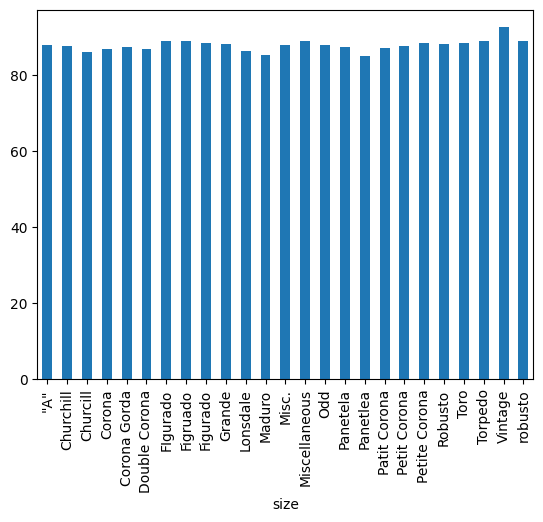

In [77]:
df.groupby('size')['score'].mean().plot(kind='bar')

<Axes: xlabel='country'>

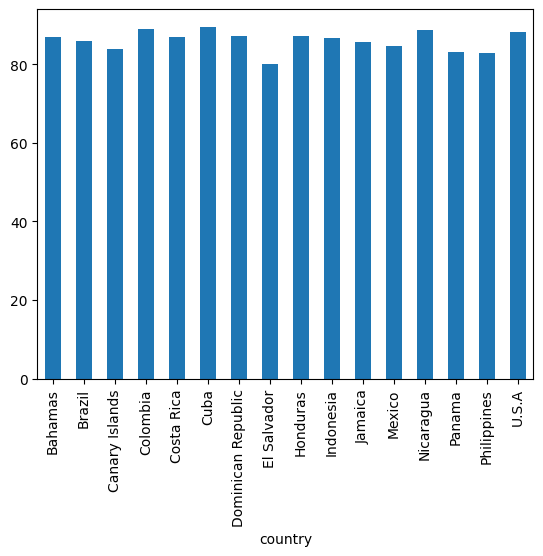

In [78]:
df.groupby('country')['score'].mean().plot(kind='bar')